In [1]:
import pandas as pd

# Load dataset
url = "https://raw.githubusercontent.com/ywchiu/riii/master/data/house-prices.csv"
df = pd.read_csv(url)

# Display first few rows to inspect the data
df.head()

# Get a summary of the dataset to check for missing values
df.info()

# Check for missing values
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Home          128 non-null    int64 
 1   Price         128 non-null    int64 
 2   SqFt          128 non-null    int64 
 3   Bedrooms      128 non-null    int64 
 4   Bathrooms     128 non-null    int64 
 5   Offers        128 non-null    int64 
 6   Brick         128 non-null    object
 7   Neighborhood  128 non-null    object
dtypes: int64(6), object(2)
memory usage: 8.1+ KB


Home            0
Price           0
SqFt            0
Bedrooms        0
Bathrooms       0
Offers          0
Brick           0
Neighborhood    0
dtype: int64

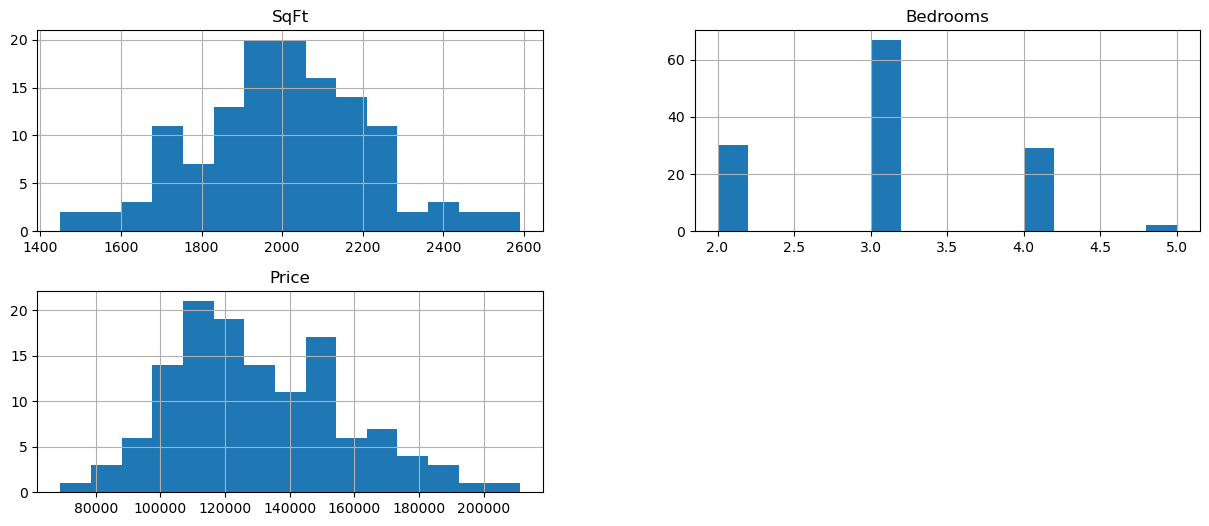

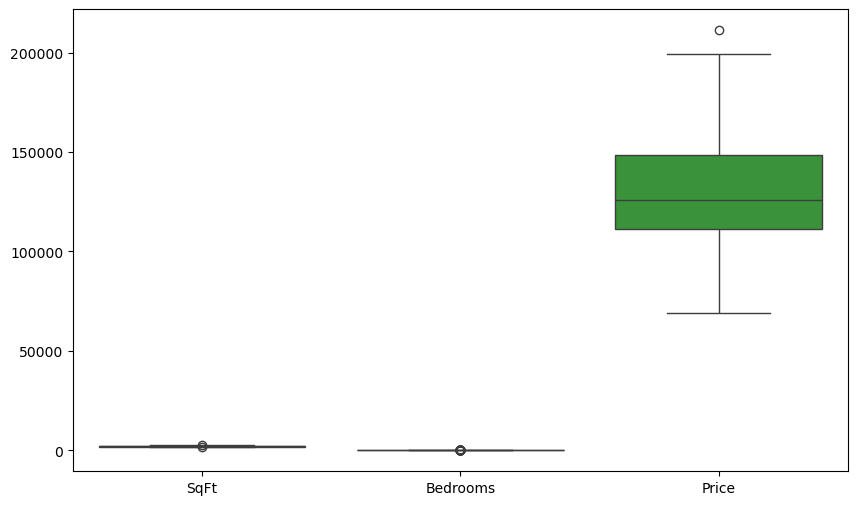

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histograms for numerical columns
df[['SqFt', 'Bedrooms', 'Price']].hist(bins=15, figsize=(15, 6))
plt.show()

# Detecting outliers using boxplots
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['SqFt', 'Bedrooms', 'Price']])
plt.show()


In [5]:
from sklearn.preprocessing import StandardScaler

# Standardize numerical features (Size, Bedrooms)
scaler = StandardScaler()
df[['SqFt', 'Bedrooms']] = scaler.fit_transform(df[['SqFt', 'Bedrooms']])


In [7]:
# One-Hot Encoding for 'Neighborhood' column
df = pd.get_dummies(df, columns=['Neighborhood'], drop_first=True)


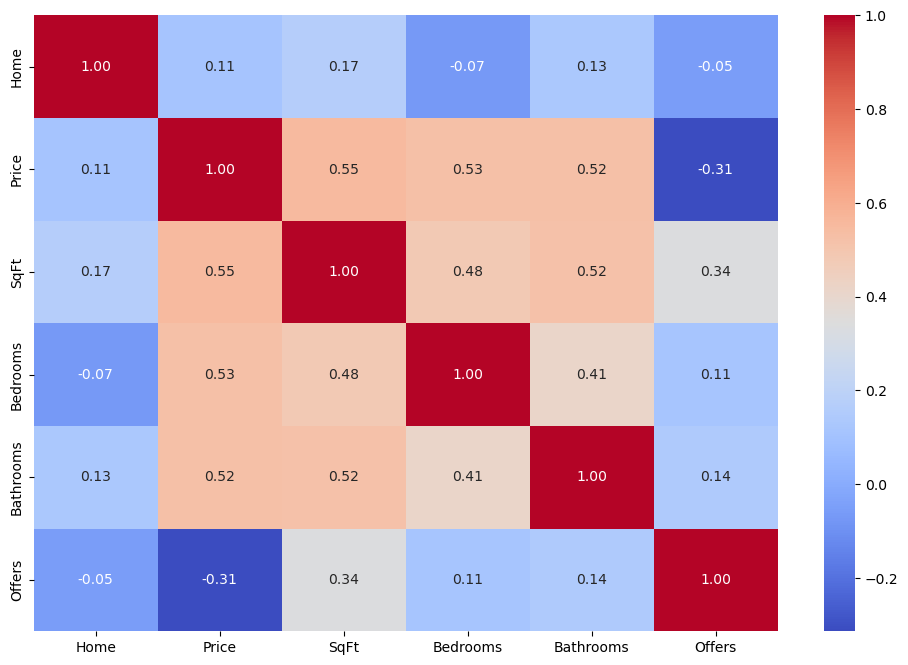

Price        1.000000
SqFt         0.552982
Bedrooms     0.525926
Bathrooms    0.523258
Home         0.108190
Offers      -0.313636
Name: Price, dtype: float64


In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Example: Assuming you have a dataframe 'df'
# Ensure only numeric columns are used for correlation
df_numeric = df.select_dtypes(include=['number'])  # Select numeric columns only

# If you have categorical columns like 'No' and 'Yes', you can map them to numeric
# Example: Assuming 'some_column' has 'Yes' and 'No' values
if 'some_column' in df.columns:
    df['some_column'] = df['some_column'].map({'No': 0, 'Yes': 1})

# Calculate the correlation matrix
corr_matrix = df_numeric.corr()

# Plot heatmap for correlations
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

# Identify important features correlating with 'Price'
if 'Price' in corr_matrix.columns:
    corr_with_price = corr_matrix['Price'].sort_values(ascending=False)
    print(corr_with_price)


In [13]:
from sklearn.model_selection import train_test_split

# Define features (X) and target variable (y)
X = df.drop(columns=['Price'])
y = df['Price']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [19]:
from sklearn.linear_model import LinearRegression

# Initialize the model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)


Model trained successfully!


In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Sample data (make sure your X_train and y_train are defined)
# Example of X_train with categorical data
X_train = pd.DataFrame({
    'Feature1': [1, 2, 3, 4, 5],
    'Feature2': ['Yes', 'No', 'Yes', 'No', 'Yes']  # This is categorical
})

y_train = pd.Series([100, 200, 150, 250, 300])  # Target variable

# Encode categorical data in 'Feature2' using LabelEncoder
label_encoder = LabelEncoder()
X_train['Feature2'] = label_encoder.fit_transform(X_train['Feature2'])

# Ensure all data is numeric (in case there are other columns with non-numeric values)
X_train = X_train.apply(pd.to_numeric, errors='coerce')

# Handle any NaN values by filling them with the column mean (optional)
X_train = X_train.fillna(X_train.mean())

# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Now you can use your trained model
print("Model trained successfully!")


Model trained successfully!
